## Simple multi-layer perceptron (MLP) for digit classification using the MNIST dataset in PyTorch

#### Install torchvision - Providing Datasets, Transforms, and Image/Video Operations for PyTorch

In [1]:
!pip install torch torchvision

#### Import libraries

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

#### Define instance of MLP model

In [3]:
class MLP_Model(nn.Module):
    def __init__(self):
        super(MLP_Model, self).__init__()
        # Define the layers: input size, hidden layer, and output layer
        self.fc1 = nn.Linear(28 * 28, 128)  # Input size is 28x28, output size is 128
        self.fc2 = nn.Linear(128, 64)       # Hidden layer with 64 units
        self.fc3 = nn.Linear(64, 10)        # Output layer with 10 units (for digits 0-9)

     # Forward function
    def forward(self, x):
      # Flatten the input
        x = x.view(-1, 28 * 28)
      # Apply ReLU activation functions to hidden layers
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
      # Output layer
        x = self.fc3(x)
        return x

#### Load the training and testing datasets

In [4]:
# This is loader data of MNIST dataset for training and testing.
def load_data(batch_size=80):
    # The Definition of data transformations for converting images to tensors.
    transform_dataset_to_tensor = transforms.Compose([transforms.ToTensor()])

    # Load training dataset
    training_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform_dataset_to_tensor)
    load_training_dataset = torch.utils.data.DataLoader(training_dataset, batch_size=batch_size, shuffle=True)

    # Load testing dataset
    testing_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform_dataset_to_tensor)
    load_testing_dataset = torch.utils.data.DataLoader(testing_dataset, batch_size=batch_size, shuffle=False)

    #return dataset trained and tested
    return load_training_dataset, load_testing_dataset

#### Function to display a sample of images from a data loader

In [5]:

def display_sample_images(data_loader, num_samples=5):
    data_iter = iter(data_loader)
    images, labels = next(data_iter)

    fig, axes = plt.subplots(1, num_samples, figsize=(12, 3))
    for i in range(num_samples):
        ax = axes[i]
        image = images[i].squeeze().numpy()
        label = labels[i].item()

        ax.imshow(image, cmap='gray')
        ax.set_title(f"Label: {label}")
        ax.axis('off')

    plt.show()

#### Train the model on the training dataset

In [6]:
# This function has purpose to train the provided neural network model using
# mini-batch gradient descent with the specified number of epochs and learning rate.
def train_model(model, load_training_dataset, n_epochs=5, learning_rate=0.001):
    # Define loss function (cross-entropy) and optimizer (Adam)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

        # The function importance lies in its role in training, evaluating, and saving a neural network model for digit classification.
    for epoch in range(n_epochs):
        running_loss = 0.0
        for i, data in enumerate(load_training_dataset, 0):
            inputs, labels = data  # Get the inputs and labels from the data loader
            optimizer.zero_grad()  # Zero the gradient buffers of all model parameters
            outputs = model(inputs)  # compute model predictions
            loss = criterion(outputs, labels)  # Compute the loss between predictions and labels
            loss.backward()  # Backpropagation: compute gradients
            optimizer.step()  # Update model parameters using the computed gradients
            running_loss += loss.item()  # Track the running loss

            if i % 100 == 99:
                print(f"Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.4f}")
                running_loss = 0.0

    # Print the training progress by displaying epoch, batch, and loss of


#### Evaluate the trained model on the testing dataset

In [7]:
# Function to evaluate the model
def evaluate_model(model, load_testing_dataset):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in load_testing_dataset:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

# calculate accuracy of my model
    accuracy = 100 * correct / total
    print(f"\n Accuracy on the test dataset: {accuracy:.3f}%")

#### Optionally, save the trained model to a file

In [8]:
# Function to save the trained model to mnist_mlp_trained_model.pth
def save_model(model, filename='mnist_mlp_trained_model.pth'):
    torch.save(model.state_dict(), filename)

#### Call all functions

100%|██████████| 9912422/9912422 [00:00<00:00, 425400952.03it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 34335514.12it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 173421886.12it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 15289348.93it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



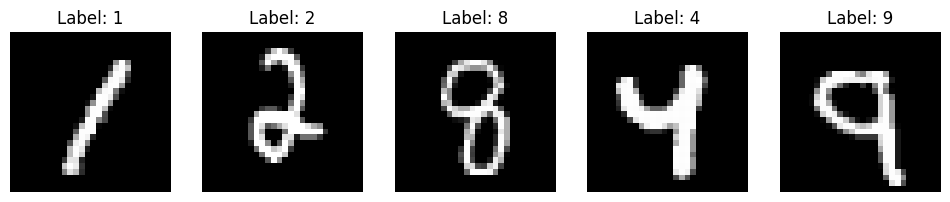

Epoch 1, Batch 100, Loss: 0.9864
Epoch 1, Batch 200, Loss: 0.3679
Epoch 1, Batch 300, Loss: 0.3203
Epoch 1, Batch 400, Loss: 0.2867
Epoch 1, Batch 500, Loss: 0.2599
Epoch 1, Batch 600, Loss: 0.2308
Epoch 1, Batch 700, Loss: 0.2164
Epoch 2, Batch 100, Loss: 0.1759
Epoch 2, Batch 200, Loss: 0.1742
Epoch 2, Batch 300, Loss: 0.1682
Epoch 2, Batch 400, Loss: 0.1528
Epoch 2, Batch 500, Loss: 0.1423
Epoch 2, Batch 600, Loss: 0.1407
Epoch 2, Batch 700, Loss: 0.1292
Epoch 3, Batch 100, Loss: 0.1081
Epoch 3, Batch 200, Loss: 0.1050
Epoch 3, Batch 300, Loss: 0.1032
Epoch 3, Batch 400, Loss: 0.1217
Epoch 3, Batch 500, Loss: 0.0968
Epoch 3, Batch 600, Loss: 0.0976
Epoch 3, Batch 700, Loss: 0.1039
Epoch 4, Batch 100, Loss: 0.0794
Epoch 4, Batch 200, Loss: 0.0816
Epoch 4, Batch 300, Loss: 0.0800
Epoch 4, Batch 400, Loss: 0.0843
Epoch 4, Batch 500, Loss: 0.0859
Epoch 4, Batch 600, Loss: 0.0720
Epoch 4, Batch 700, Loss: 0.0771
Epoch 5, Batch 100, Loss: 0.0584
Epoch 5, Batch 200, Loss: 0.0609
Epoch 5, B

In [9]:
# Create an instance of your MLP model
model = MLP_Model()

# Load the training and testing datasets
load_training_dataset, load_testing_dataset = load_data(batch_size=80)

# Display a sample of training images
display_sample_images(load_training_dataset, num_samples=5)

# Train the model on the training dataset
train_model(model, load_training_dataset, n_epochs=5, learning_rate=0.001)

# Evaluate the trained model on the testing dataset
evaluate_model(model, load_testing_dataset)

# Save the trained model to a file - mnist_mlp_trained_model.pth
save_model(model, filename='mnist_mlp_trained_model.pth')
